# Real-time carbon accounting and material transition for hydrogen systems

__author__ = "Marco De Sousa"
__copyright__ = "Copyright 2023, Multi-parametric Optimization & Control Lab"
__credits__ = ["Marco De Sousa", "Rahul Kakodkar", "Efstratios N. Pistikopoulos"]
__license__ = "MIT"
__version__ = "1.1.0"
__maintainer__ = "Marco De Sousa"
__email__ = "marcopdsousa@tamu.edu"
__status__ = "Production"


## Problem Statement

The following case study considers three different type of solar photovoltaics, namely Monocrystalline (PV_Mo), Polycrystalline (PV_Po), and Cadmium Telluride (PV_Cd) and  Lithium-ion batteries made of either rock-based lithium (LiI_Ro) or brine-based lithium (LiI_Br).

The goal is to meet a fixed demand of hydrogen on a daily scale while optimizing the production process by using forecasting techniques.

It is important to note that three different hydrogen pathways can be utilized each with their respective emissions.

Hypothesis: By using real-time carbon accounting, decisions and changes can be made in a more dynamic nature.

Users are advised caution in terms of assigning the emissions at the appropriate levels and avoiding double account. For example, if providing the global warming potentials (GWP) for each individual material to make up a process, the GWP for processes should only consider the values for construction. Moreover, the direct emissions are considered through the resource balance constraint.

## Nomenclature



*Sets*


$\mathcal{R}$ - set of all resources r

$\mathcal{P}$ - set of all processes p

$\mathcal{T}$ - set of temporal periods t

$\mathcal{B}$ - set of transport modes b

$\mathcal{L}$ - set of locations l

$\mathcal{M}$ - set of materials m

*Subsets*


$\mathcal{R}^{storage}$ - set of resources that can be stored

$\mathcal{R}^{sell}$ - set of resources that can be discharged

$\mathcal{R}^{demand}$ - set of resources that meet  demand

$\mathcal{R}^{cons}$ - set of resources that can be consumed

$\mathcal{R}^{trans}$ - set of resources that can be transported

$\mathcal{P}^{uncertain}$ - set of processes with uncertain capacity

$\mathcal{T}^{net}$ - set of temporal periods t for network level decision making

$\mathcal{T}^{sch}$ - set of temporal periods t for schedule level decision making

*Continuous Variables*


$P_{l,p,t}$ - production level of p $\in$  $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{sch}$  

$C_{l,r,t}$ - consumption of r $\in$ in $\mathcal{R}^{cons}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$S_{l,r,t}$ - discharge of r $\in$ in $\mathcal{R}^{demand}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$Inv_{l,r,t}$ - inventory level of r $\in$ $\mathcal{R}^{storage}$  in time period t $\in$ $\mathcal{T}^{sch}$

$Cap^S_{l,r,t}$ - installed inventory capacity for resource r $\in$  $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$

$Cap^P_{l,p,t}$ - installed production capacity for process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$Mat^P_{l,p,m,t}$ - material m $\in$ $\mathcal{M}$ used by process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$Em^{p/r/m}_{l,p/r/m,t}$ - emission from process/resource/material in time t $\in$ $\mathcal{T}^{net}$


*Binary Variables*

$X^P_{l,p,t}$ - network binary for production process p $\in$ $\mathcal{P}$

$X^S_{l,r,t}$ - network binary for inventory of resource r $\in$  $\mathcal{R}^{storage}$ 

*Parameters*

$Cap^{P-max}_{l,p,t}$ - maximum production capacity of process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Cap^{S-max}_{l,r,t}$ - maximum inventory capacity for process r $\in$ $\mathcal{R}^{storage}$ in time t $\in$ $\mathcal{T}^{net}$

$Capex_{l,p,t}$ - capital expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Vopex_{l,p,t}$ - variable operational expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{sch}$

$Price_{l,r,t}$ - purchase price for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$C^{max}_{l,r,t}$ - maximum consumption availability for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$D_{l,r,t}$ - demand for resource r $in$ $\mathcal{R}^{sell}$ in time t $\in$ $\mathcal{T}^{sch}$

$\alpha$ - annualization factor

$Mat^{cons}_{p,m}$ - material m $\in$ $\mathcal{M}$ consumed by process p $\in$ $\mathcal{P}$

$GWP^{p/r/m}_{l,p/r/m,t}$ - global warming indicators for process/resource/material in time t $\in$ $\mathcal{T}^{net}$


## MILP Formulation

Given is a mulit-scale modeling and optimization MILP framework for the simultaneous design and schedule planning of a single location energy system 

\begin{equation}
min \sum_{l \in \mathcal{L}} \Big(\sum_{t \in \mathcal{T}^{net}} \sum_{p \in \mathcal{P}} (\alpha \times Capex_{l,p,t} + Fopex_{l,p,t}) \times Cap^P_{l,p,t} +  \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}}  Vopex_{l,r,t} \times P_{l,r,t} 
\end{equation}

\begin{equation*}
+ \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}^{cons}} C_{l,r,t} \times Price_{l,r,t} \Big)
\end{equation*}

\begin{equation}
Cap^S_{l,r,t} \leq Cap^{S-max}_{l,r,t} \times X^S_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
Cap^P_{l,p,t} \leq Cap^{P-max}_{l,p,t} \times X^P_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}, l \in \mathcal{L}
\end{equation} 

\begin{equation}
P_{l,p,t} \leq Cap^{P}_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{sch}
\end{equation} 

\begin{equation}
Inv_{l,r,t} \leq Cap^{S}_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{sch}
\end{equation} 


\begin{equation}
- S_{l,r,t} \leq - D_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
C_{l,r,t} \leq C^{max}_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
\sum_{p \in \mathcal{P}} P_{l,p,t} \times \eta(p,r) + C_{l,r,t} +  Inv_{l,r,t-1}=  Inv_{l,r,t} + S_{l,r,t}  
\end{equation}

\begin{equation*}
\forall r \in \mathcal{R}^{cons}, t \in \mathcal{T}^{sch}, l \in \mathcal{L}
\end{equation*}

\begin{equation}
Mat_{l,p,m,t} = Mat^{cons}_{p,m} \times Cap^P_{l,p,t} \hspace{1cm} \forall m \in \mathcal{M}, p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
Em^{r}_{l,r,t} = GWP^{r}_{l,r,t} \times C_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
Em^{m}_{l,m,t} = GWP^{m}_{l,m,t} \times \sum_{p \in \mathcal{P}} Mat_{l,p,m,t} \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
Em^{p}_{l,p,t} = GWP^{p}_{l,p,t} \times Cap_{l,p,t} \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
S_{l,r,t}, C_{l,r,t}, Inv_{l,r,t}, P_{l,p,t}, Cap^P_{l,p,t}, Cap^S_{l,r,t}, Mat_{l,p,m,t}, Em^{p/r/m}_{l,p/r/m,t} \in R_{\geq 0}
\end{equation}



## Import Modules

In [1]:
import sys
sys.path.append('../src')

In [2]:
import pandas as pd
import numpy
from energiapy.components.temporal_scale import TemporalScale
from energiapy.components.resource import Resource, VaryingResource, Scope
from energiapy.components.process import Process, VaryingProcess
from energiapy.components.material import Material
from energiapy.components.location import Location
from energiapy.components.network import Network
from energiapy.components.scenario import Scenario
from energiapy.components.transport import Transport
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.plot import plot_results, plot_scenario
from energiapy.plot.plot_results import CostY, CostX
from energiapy.model.solve import solve
from itertools import product
from energiapy.components.result import Result
from itertools import product
from matplotlib import rc
import matplotlib.pyplot as plt
from energiapy.model.solve import solve
from energiapy.plot.plot_results import CostY, CostX
from energiapy.components.location import Location
from energiapy.plot import plot_results, plot_scenario
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.model.bounds import CapacityBounds
from energiapy.utils.data_utils import get_data, make_henry_price_df, remove_outliers, load_results
from energiapy.conversion.photovoltaic import solar_power_output
from energiapy.conversion.windmill import wind_power_output
from energiapy.model.constraints.integer_cuts import constraint_block_integer_cut, constraint_block_integer_cut_min

## Data Import

In [3]:
horizon = 1

The following data is needed for the model

- Daily demands of hydrogen.
- The capacity factor of renewable energy sources and traditional grid power.


**Declare temporal scale**

The variabilities of energy systems are best captured over a discretized spatio-temporal scale. In energiapy, the first declaration is the temporal scale. 

For e.g.: Here we declare three temporal scales at different levels from right to left. The interpretation of these scales is merely symentic. Scales can be declared as the problem demands.
- 0, annual, with 1 discretization
- 1, daily with 365 discretization
- 2, hourly with 24 discretization

In essence, we are creating a temporal scale of 8760 points.



In [4]:
scales = TemporalScale(discretization_list=[1, 24])

In [5]:
# scales.scale_iter(0)
# scales.scale_iter(1)


## Declare resources

Resources can be consumed, produced, stored, discharged (or sold).

Power demand follows a varying deterministic demand

In [6]:
bigM = 10**8
smallM = 0.001

Hourly electricity prices

In [7]:
# elec_price_df = pd.read_csv('C:/Users/marcopdsousa/Documents/energiapy/Real-Time/Dataset/cdr.csv')
# #elec_price_df = elec_price_df[elec_price_df['SettlementPoint'] == 'HB_HOUSTON']
# elec_price_df = elec_price_df[['HB_HOUSTON']].reset_index(drop = True)
# elec_price_df = elec_price_df[:24]
# elec_price_df

elec_price_df = pd.read_csv("C:/Users/marcopdsousa/Documents/energiapy/Real-Time/Dataset/cdr.csv")
#edf3 = pd.concat(edf3.values(), ignore_index=True)
elec_price_df = elec_price_df[elec_price_df['SettlementPoint'] == 'HB_HOUSTON'][['SettlementPointPrice']].reset_index(drop = True)
elec_price_df


,SettlementPointPrice
0,23.01
1,20.46
2,20.21
3,19.32
4,19.47
5,20.75
6,24.34
7,23.52
8,16.99
9,14.68


In [8]:
print(type(elec_price_df))

<class 'pandas.core.frame.DataFrame'>


Hourly Natural Gas Prices

In [9]:
#The natural gas price is calculated as the average between the high and low cost, also the unit used is $/kg of natural gas
NG_price_df = pd.read_csv('C:/Users/marcopdsousa/Documents/energiapy/Real-Time/Dataset/RT 20 AUGUST 2024.csv')
# NG_price_df = pd.DataFrame(NG_price_df['USD/kg'])[::-1].reset_index()
NG_price_df = NG_price_df[['NG_Price']]
NG_price_df = NG_price_df[:24]
NG_price_df

,NG_Price
0,0.140173
1,0.140681
2,0.140173
3,0.140173
4,0.139665
5,0.138649
6,0.140681
7,0.140681
8,0.143220
9,0.143728


In [10]:
print(type(NG_price_df))

<class 'pandas.core.frame.DataFrame'>


In [11]:
# #The natural gas price is calculated as the average between the high and low cost, also the unit used is $/kg of natural gas
# Demand_df = pd.read_csv('RT 06 JUNE.csv')
# # NG_price_df = pd.DataFrame(NG_price_df['USD/kg'])[::-1].reset_index()
# Demand_df = Demand_df[['demand']]
# Demand_df = Demand_df[:24]
# Demand_df

In [12]:
# #The natural gas price is calculated as the average between the high and low cost, also the unit used is $/kg of natural gas
# GWP_df = pd.read_csv('C:/Users/marcopdsousa/Documents/energiapy/Real-Time/RT 20 AUGUST 2024.csv')
# # NG_price_df = pd.DataFrame(NG_price_df['USD/kg'])[::-1].reset_index()
# GWP_df = GWP_df[['GWP']]
# GWP_df = GWP_df[:24].reset_index(drop = True)
# GWP_df

In [13]:
# print(type(GWP_df))

In [14]:
#Gives relevancy to price values again
elec_price = elec_price_df.max()[0]
NG_price = NG_price_df.max()[0]
#GWP_value = GWP_df.max()[0]
#Demand_value = Demand_df.max()[0]

C:\Users\marcopdsousa\AppData\Local\Temp\ipykernel_34132\2621186345.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elec_price = elec_price_df.max()[0]
C:\Users\marcopdsousa\AppData\Local\Temp\ipykernel_34132\2621186345.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  NG_price = NG_price_df.max()[0]


Hourly Wind availability

In [15]:
Wind_df = pd.read_csv('C:/Users/marcopdsousa/Documents/energiapy/Real-Time/Dataset/WindActual.csv')
Wind_df = Wind_df[['0']]
Wind_df = Wind_df[:24]
Wind_df

,0
0,0.652162
1,0.540757
2,0.522405
3,0.460173
4,0.403061
5,0.382570
6,0.358856
7,0.349040
8,0.319686
9,0.188334


Hourly Solar availability

In [16]:
Solar_df = pd.read_csv('C:/Users/marcopdsousa/Documents/energiapy/Real-Time/Dataset/SolarActual.csv')
Solar_df = Solar_df[['0']]
Solar_df = Solar_df[:24]
Solar_df

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.309123
9,0.858449


In [17]:
Solar = Resource(name='Solar', cons_max=bigM, basis='MW', label='Solar Power', price= 52.69, gwp=0, scope=Scope.TWO)

Wind = Resource(name='Wind', cons_max=bigM, basis='MW', label='Wind Power', price= 60.11, gwp=0, scope=Scope.TWO)

Power = Resource(name='Power', basis='MW',
                 label='Power generated')

GridPower = Resource(name='GridPower', basis='MW',
                     cons_max=bigM, label='Power bought', gwp= 351.31, price =elec_price ,varying = [VaryingResource.DETERMINISTIC_PRICE], scope = Scope.TWO)
#elec_price, varying = [VaryingResource.DETERMINISTIC_PRICE]
#The following are components of natural gas

CO2 = Resource(name='CO2', basis='kg/hr',
               label='Carbon dioxide', block='Resource')

CO2_Stack = Resource(name='CO2 to Stack', basis='kg/hr', sell=True,
               label='Carbon dioxide to Stack', block='Resource', gwp = 1, scope = Scope.ONE)

CO2_Air = Resource(name='CO2 from air', basis='kg/hr',
               label='Carbon dioxide from air', block='Resource', cons_max=bigM)

CO2_Vent = Resource(name='CO2 Vented from the process', basis='kg/hr',
               label='Carbon dioxide vented from the process', block='Resource', gwp = 1, sell=True, scope = Scope.ONE)

CO2cpt = Resource(name='CO2 Captured', basis='kg/hr', sell=True, label='Captured carbon dioxide', block='Resource')

CH4 = Resource(name='CH4', basis='kg/hr',
               label='Methane', block='Resource')

#Important: Natural gas consists over different components

NG = Resource(name='Natural Gas', basis='kg/hr',
                     cons_max=bigM, label='Natural Gas', gwp = 0.660979, price = NG_price, varying = [VaryingResource.DETERMINISTIC_PRICE])


# Hydrogen is what I want to sell/satisfy a specific demand for

H2 = Resource(name='Hydrogen', basis='kg/hr', label='Hydrogen', block='Resource')

H2Pure = Resource(name='Pure Hydrogen', demand = True, basis='kg/hr', label='Pure Hydrogen', block='Resource')

# Water is required for the electrolysis process

H2O = Resource(name='H2O',
               basis='kg/hr', cons_max=bigM, label='Water', block='Resource')

#Industrial water price is 0.002 USD/kg of water
H2OFresh = Resource(name="H2O Fresh", cons_max=bigM, price = 0.002, basis='kg/hr', label='Fresh Water', block='Resource')

H2O_Air = Resource(name='H2O from air', cons_max=bigM,
               basis='kg/hr', label='Water from air', block='Resource')

H2O_Vent = Resource(name='H2O vented from the process',
               basis='kg/hr', sell=True, label='Water vented from the process', block='Resource')


H2O_Stack = Resource(name='H2O to Stack',
               basis='kg/hr', sell= True, label='Water to Stack', block='Resource')

#Industrial water price is 0.002 USD/kg of water

# Air components

N2 = Resource(name='N2', basis='kg/hr',
               label='Nitrogen', block='Resource')

N2_SMR = Resource(name='N2 from SMR', basis='kg/hr',
               label='Nitrogen from SMR', block='Resource')

N2_WGS = Resource(name='N2 from WGS', basis='kg/hr',
               label='Nitrogen from WGS', block='Resource')

N2_FG = Resource(name='N2 from FG', basis='kg/hr',
               label='Nitrogen from FG', block='Resource')

N2_Air = Resource(name='N2 from Air', basis='kg/hr', cons_max= bigM,
               label='Nitrogen from Air', block='Resource')

N2_Vent = Resource(name='N2 vented from the process', basis='kg/hr', sell= True,
               label='Nitrogen vented from the process', block='Resource')

N2Prod = Resource(name='N2 in product stream', basis='kg/hr', sell = True,
               label='Nitrogen in product stream', block='Resource')

N2_Stack = Resource(name='N2 to Stack', basis='kg/hr', sell= True,
               label='Nitrogen to stack', block='Resource')

O2 = Resource(name='O2', basis='kg/hr',
               label='Oxygen', block='Resource')

O2_Air = Resource(name='O2 from air', basis='kg/hr',
               label='Oxygen from air', block='Resource', cons_max = bigM)

O2_Vent = Resource(name='O2 vented from the process', basis='kg/hr', sell=True,
               label='Oxygen vented from the process', block='Resource')

O2_Stack = Resource(name='O2 to Stack', basis='kg/hr', sell= True,
               label='Oxygen to Stack', block='Resource')


# Saatvi code starts

H2O_Vent_ASU = Resource(name='H2O Vent from ASU',
               basis='kg/hr', sell= True, label='Water vented from ASU', block='Resource') # True for ATR - Stream 17

H2O_Blowdown = Resource(name='H2O in Blowdown',
               basis='kg/hr', sell= True, label='H2O present in air - Stream 5', block='Resource') # True for ATR - Stream 20

# Saatvi code ends


# Saatvi Code starts

N2_Desorped = Resource(name='N2 Desorped', basis='kg/hr', sell = True,
               label='Nitrogen in CO2 desorption stream', block='Resource') # True for ATR
N2_Vented_Stack = Resource(name='N2 in Stack', basis='kg/hr', sell = True,
               label='Nitrogen in Stack', block='Resource') # True for ATR
N2_Blowdown = Resource(name='N2 in Blowdown', basis='kg/hr', sell = True,
               label='Nitrogen in Blowdown stream', block='Resource') # True for ATR

# Saatvi code ends


# Saatvi Code starts

O2_Desorped = Resource(name='O2 Desorped', basis='kg/hr',
               label='Oxygen in CO2 desorption stream', block='Resource') # True for ATR
O2_ASU = Resource(name='O2 vented out of ASU', basis='kg/hr', sell = True,
               label='O2 vented out of ASU', block='Resource') # True for ATR
O2_Blowdown = Resource(name='O2 in Blowdown', basis='kg/hr',
               label='O2 in Blowdown stream', block='Resource') # True for ATR

# Saatvi code ends


# Saatvi code starts

CH4_Desorped = Resource(name='CH4_Desorped', basis='kg/hr',
               label='Methane', block='Resource') # True for ATR

# Saatvi code ends

# Saatvi code starts - Declares CO2 going into the Boiler via Air stream 5 in ATR process

CO2_Blowdown= Resource(name='CO2 Blowdown', basis='kg/hr', block='Resource', sell = True, gwp = 1) # 2 ATR processes, imp, Stream X+20, 16+20

# Saatvi code ends

## Declare Materials

Materials are utilized for the establishment of processes. Materials inturn require resources to be set up. 

In [18]:
'''Do I understand it correctly that I will have no material modes'''

'Do I understand it correctly that I will have no material modes'

## Declare Processes

In [19]:
'''Purchasing electricity from a traditional power production system'''

Grid = Process(name='Grid', conversion={GridPower: -1, Power: 1}, prod_min=smallM, prod_max=bigM, label='Grid', basis='MW')

PV = Process(name='PV', conversion={Solar: -1, Power: 1},
             prod_max=150, prod_min=150,  varying= [VaryingProcess.DETERMINISTIC_CAPACITY], label='Solar PV', basis='MW')

# capex=0.0001, fopex=0.0001, vopex=0.0001, gwp = 0.0001

WF = Process(name='WF', conversion={Wind: -1, Power: 1},
             prod_max=300, prod_min=300, label='Wind mill array', varying=[VaryingProcess.DETERMINISTIC_CAPACITY], basis='MW')


# SMRCCS = Process(name='SMRCCS', conversion={Power: -0.00204, NG: -3.535189, H2OFresh: -16.78877421, N2_Air: -22.2315, O2_Air: -6.811924, H2O_Air: -0.183055, CO2_Air: -0.013551, 20000*24
#                                             H2Pure: 1, CO2_Stack: 0.46856, CO2cpt: 8.903, H2O_Stack: 0.558114, H2O_Vent: 3.826767, N2_Stack: 22.32218, O2_Stack: 0.6203032}, capex=0.0001,
#                vopex=2.3, fopex=0.001, prod_min=smallM, prod_max=bigM, label='SMR', basis='kg/hr')

SMR = Process(name='SMR', conversion={Power: -0.00065, NG: -3.535189, H2OFresh: -16.78877421, N2_Air: -19.2134, O2_Air: -5.88716, H2O_Air: -0.1582, CO2_Air: -0.01171, 
                                            H2Pure: 1, CO2_Stack: 9.3713,  H2O_Stack: 3.94959, N2_Stack: 19.29814, O2_Stack: 0.535434}, capex=0.0001,
               vopex=0.78, fopex=0.06, prod_min=smallM, prod_max=15580, label='SMR', basis='kg/hr')

'''2.3,SMR Vopex =  0.84'''


SMRCCS = Process(name='SMRCCS', conversion={Power: -0.00139, N2_Air: -22.2315, O2_Air: -6.811924, H2O_Air: -0.183055, CO2_Air: -0.013551, CO2_Stack: -9.3713,
                                             H2O_Vent: 3.826767, CO2cpt: 8.903, CO2_Vent: 0.46856, H2O_Stack: 0.558114, N2_Stack: 22.32218, O2_Stack: 0.6203032, }, capex=0.0001,
                vopex=1.01, fopex=0.01, prod_min=smallM, prod_max=13030, label='SMRCCS', basis='kg/hr')


# PEM = Process(name='PEM', conversion={Power: -0.064, H2OFresh: -9.5,
#                                             H2Pure: 1}, capex=0.0001,
#                vopex=3.73, fopex=0.001, prod_min=smallM, prod_max=18.75, label='PEM', basis='kg/hr')

# ATR_CCS_R = Process(name='ATR_CCS_R', conversion= {Power: -0.00175403726, NG: -3.2080287, H2OFresh: -4.8123228, H2O_Air : -0.1041653, H2O_Blowdown : 1.7351222, H2O_Vent : 0.5239897,
#                                                    N2_Air: -12.653394, N2_Vent: 9.970844643, N2Prod: 0.002780318, N2_Vented_Stack: 2.182324573, N2_Desorped: 0.023329689, O2_Air: -3.87607534,
#                                                    O2_ASU: 0.061984387, O2_Vent: 0.0647028, CO2_Air:-0.007711159, CO2_Vent: 0.457276602, CO2cpt: 7.733322317, H2Pure: 1}, capex=0.0001,
#                vopex=0.82, fopex=0.001, prod_min=smallM, prod_max=20000, label='ATR_CCS_R', basis='kg/hr')

# ATR_CCS_OC = Process(name='ATR_CCS_OC', conversion={Power: -0.0059130434, NG: -3.584338787, CO2_Air: -0.010770164, CO2_Blowdown: 0.11601384, CO2cpt: 9.192057517, N2_Air: -17.67297545, N2_Vent: 16.7175342, 
#                                                     N2_Blowdown: 0.000797082, N2_Desorped: 0.131330546, N2Prod: 0.002780318,
#                                                     H2O_Air: -0.145487576, H2OFresh: -5.377267146, H2O_Vent_ASU: 0.003250534, H2O_Blowdown: 3.598489736, O2_Air: -6.758549377, O2_Vent: 0.10392561, H2Pure: 1}, capex=0.0001,
#                vopex=0.87, fopex=0.001, prod_min=smallM, prod_max=20000, label='ATR_CCS_OC', basis='kg/hr')

# ATR_CCS_R_OC = Process(name='ATR_CCS_R_OC', conversion={Power: -0.00203229813, NG: -3.208028688, CO2_Air: -0.007656042, CO2_Blowdown: 0.671400596, CO2cpt: 8.152141983, 
#                                                         N2_Air: -12.56295099, N2_Vent: 11.88406435, N2_Blowdown: 0.008434949, N2_Desorped: 0.102417105, N2Prod: 0.002780318, 
#                                                         H2OFresh: -4.812322829, H2O_Air: -0.103420802, H2O_Vent_ASU: 0.002310721, H2O_Blowdown: 0.004504513, O2_Air: -4.804359335, 
#                                                         O2_Vent: 0.073878039, H2Pure: 1}, capex=0.0001,
#                vopex=0.85, fopex=0.001, prod_min=smallM, prod_max=20000, label='ATR_CCS_R_OC', basis='kg/hr')
# AWE = Process(name='AWE', conversion={Power: -0.05, H2OFresh: -9.4635, H2Pure: 1}, capex=0.0001,vopex=4.250633, fopex=0.001, prod_min=smallM, prod_max=18.75, label='AWE', basis='kg/hr')

## Declare Location

In [20]:
process_set = {Grid, PV, WF, SMRCCS, SMR} #Grid,PV, WF, PEM,SMRCCS, SMRCCS, PEM, AWEAWE, ATR_CCS_R,

In [21]:
houston = Location(name='HO', processes=process_set,  price_factor={GridPower: elec_price_df, NG: NG_price_df}, capacity_factor={PV: Solar_df, WF: Wind_df},
                   scales=scales, label='Houston', expenditure_scale_level=0, demand_scale_level=0, price_scale_level=1, capacity_scale_level=1, gwp_scale_level=1)

#capacity_factor={PV: Solar_df, WF: Wind_df}, , gwp_factor={GridPower: GWP_df},  gwp_scale_level = 1,

## Declare Scenario

In [22]:

scenario = Scenario(name='scenario_full', network=houston, scales=scales,  expenditure_scale_level=0, demand_scale_level=0, 
                    purchase_scale_level = 1, scheduling_scale_level=1, network_scale_level=0, capacity_scale_level=1, gwp_scale_level = 1, 
                    label='full_case', demand={houston: {H2Pure:200000}})

# gwp_scale_level = 1,

In [23]:

# a = scenario.make_conversion_df()


In [24]:
# a.to_csv('as.csv')

In [25]:
# scenario.capacity_factor['HO'].keys()

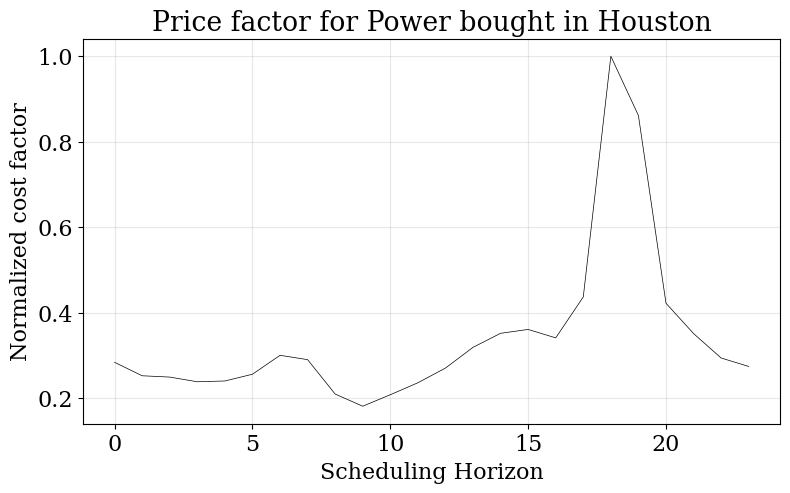

In [26]:

plot_scenario.price_factor(
    scenario=scenario, location=houston, resource=GridPower, fig_size=(9, 5), color='black')


In [27]:
# plot_scenario.gwp_factor(
#     scenario=scenario, location=houston, resource=GridPower, fig_size=(9, 5), color='midnightblue')

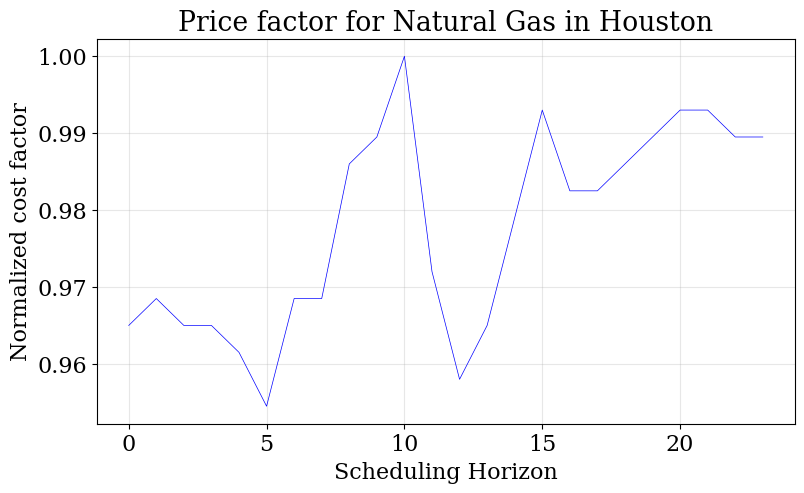

In [28]:

plot_scenario.price_factor(
    scenario=scenario, location=houston, resource=NG, fig_size=(9, 5), color='blue')

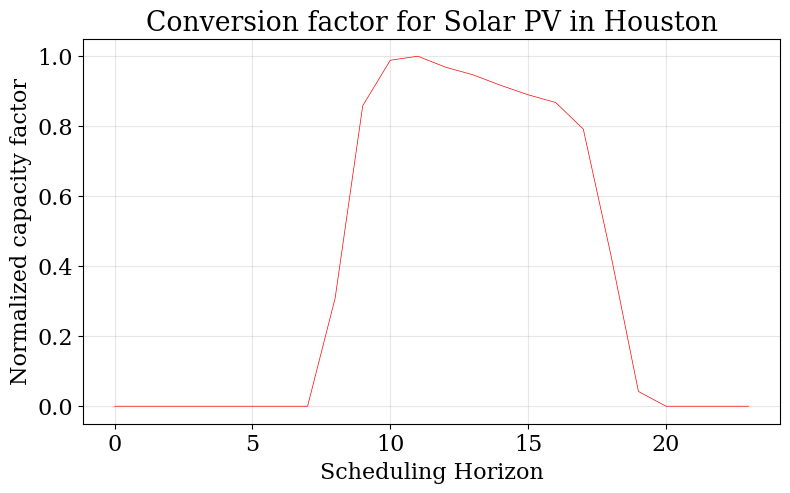

In [29]:
plot_scenario.capacity_factor(
    scenario=scenario, location=houston, process=PV, fig_size=(9, 5), color='red')

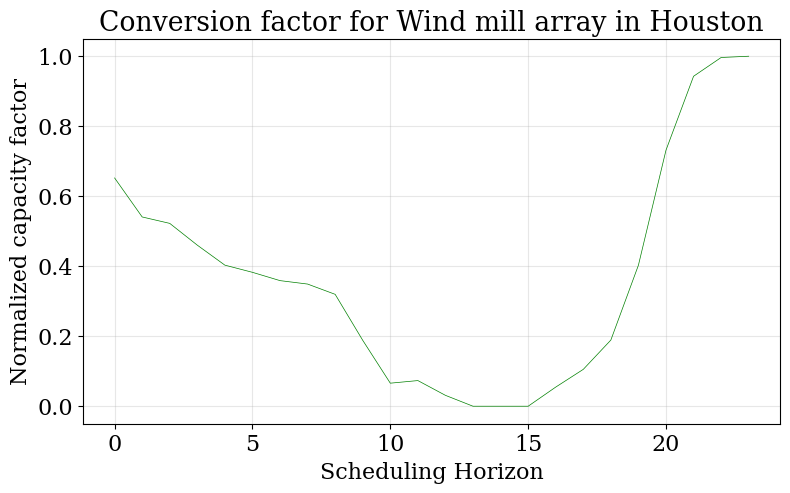

In [30]:
plot_scenario.capacity_factor(
    scenario=scenario, location=houston, process=WF, fig_size=(9, 5), color='green')

## Formulate MILP

Here we formulate two milps which differ only in their objectives.

For maximizing the discharge of a particular resource, use the objective MAX_DISCHARGE, the objective resource also needs to be specified.

Similarly the discharge can also be minimized using MIN_DISCHARGE. This can be used with a demand for another resource being set. For example, minimizing the discharge of carbon dioxide while meeting a hydrogen demand.

The second MILP, minimized the cost while meeting a varying demand for power

In [31]:
#, Constraints.MODE

milp_cost = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint production mode
constraint inventory balance
constraint inventory network
constraint demand
objective cost


In [32]:
# # model.component

# from pyomo.environ import ConstraintList
# milp_cost.cons1 = ConstraintList()
# for i in scales.scale_iter(2):
#     milp_cost.cons1.add(expr = milp_cost.P['HO', 'SMR', *i] >= 1000)

In [33]:
# from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
# from pyomo.environ import Var, Binary, ConstraintList  

# def modeler(gwp_pct: float):
#     gwp_eval = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION, Constraints.NETWORK,
#                         Constraints.RESOURCE_BALANCE, Constraints.DEMAND, Constraints.EMISSION, Constraints.MATERIAL}, objective=Objective.COST, demand_sign = 'geq')
#     gwp_eval.cons2 = ConstraintList()
#     gwp_eval.cons3 = ConstraintList()
#     gwp_eval.cons4 = ConstraintList()
#     gwp_eval.cons5 = ConstraintList()
#     gwp_eval.cons8 = ConstraintList()
#     gwp_eval.cons9 = ConstraintList()
#     gwp_eval.cons10 = ConstraintList()
#     gwp_eval.cons11 = ConstraintList()
#     gwp_eval.cons13 = ConstraintList()
#     gwp_eval.cons14 = ConstraintList()
#     gwp_eval.cons15 = ConstraintList()
#     gwp_eval.cons17 = ConstraintList()

#     for i in scales.scale_iter(2):
#         gwp_eval.cons10.add(expr = gwp_eval.P['HO', 'SMR', *i] >= 0.3*gwp_eval.Cap_P['HO','SMR', i[0]]) #30% of max production rate 6000 * milp_cost.on_smr[i]
#         gwp_eval.cons11.add(expr = gwp_eval.P['HO', 'ATR_CCS_R', *i] >= 0.2*gwp_eval.Cap_P['HO','ATR_CCS_R', i[0]]) #20% of max production rate
#         gwp_eval.cons13.add(expr = gwp_eval.P['HO', 'ATR_CCS_R_OC', *i] >= 0.2*gwp_eval.Cap_P['HO','ATR_CCS_R_OC', i[0]]) #20% of max production rate
#         gwp_eval.cons14.add(expr = gwp_eval.P['HO', 'SMR', *i] <=gwp_eval.Cap_P['HO','SMR', i[0]])
#         gwp_eval.cons15.add(expr = gwp_eval.P['HO', 'ATR_CCS_R', *i] <= gwp_eval.Cap_P['HO','ATR_CCS_R', i[0]])
#         gwp_eval.cons17.add(expr = gwp_eval.P['HO', 'ATR_CCS_R_OC', *i] <= gwp_eval.Cap_P['HO','ATR_CCS_R_OC', i[0]])
#         if i != (0,0,0):
#             milp_cost.cons2.add(expr = milp_cost.P['HO', 'SMR', *i] - gwp_eval.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.05*gwp_eval.Cap_P['HO','SMR', i[0]])
#             milp_cost.cons3.add(expr = milp_cost.P['HO', 'SMR', *i] - gwp_eval.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.05*gwp_eval.Cap_P['HO','SMR', i[0]])
#             milp_cost.cons4.add(expr = milp_cost.P['HO', 'ATR_CCS_R', *i] - gwp_eval.P['HO', 'ATR_CCS_R', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.1*gwp_eval.Cap_P['HO','ATR_CCS_R', i[0]])
#             milp_cost.cons5.add(expr = milp_cost.P['HO', 'ATR_CCS_R', *i] - gwp_eval.P['HO', 'ATR_CCS_R', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.1*gwp_eval.Cap_P['HO','ATR_CCS_R', i[0]])
#             milp_cost.cons8.add(expr = gwp_eval.P['HO', 'ATR_CCS_R_OC', *i] - gwp_eval.P['HO', 'ATR_CCS_R_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.1*gwp_eval.Cap_P['HO','ATR_CCS_R_OC', i[0]])
#             milp_cost.cons9.add(expr = gwp_eval.P['HO', 'ATR_CCS_R_OC', *i] - gwp_eval.P['HO', 'ATR_CCS_R_OC', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.1*gwp_eval.Cap_P['HO','ATR_CCS_R_OC', i[0]])


#     constraint_global_warming_potential_network_reduction(instance= gwp_eval, network_scale_level = 0, gwp_reduction_pct = gwp_pct, gwp = results_cost.output['global_warming_potential_network'][0])
    
#     return gwp_eval

In [34]:
# #model.component

from pyomo.environ import ConstraintList


milp_cost.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_cost.cons2.add(expr = milp_cost.P['HO', 'SMR', *i] - milp_cost.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= 0.05*milp_cost.Cap_P['HO','SMR', i[0]])

milp_cost.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_cost.cons3.add(expr = milp_cost.P['HO', 'SMR', *i] - milp_cost.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] >= -0.05*milp_cost.Cap_P['HO','SMR', i[0]])


milp_cost.cons4 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_cost.cons4.add(expr = milp_cost.P['HO', 'SMRCCS', *i] - milp_cost.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= 0.05*milp_cost.Cap_P['HO','SMRCCS', i[0]])

milp_cost.cons5 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_cost.cons5.add(expr = milp_cost.P['HO', 'SMRCCS', *i] - milp_cost.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] >= -0.05*milp_cost.Cap_P['HO','SMRCCS', i[0]])


In [35]:
milp_cost.cons10 = ConstraintList()
for i in scales.scale_iter(1):
        #if i != (0,0):
            milp_cost.cons10.add(expr = milp_cost.P['HO', 'SMR', *i] >= 0.3*milp_cost.Cap_P['HO','SMR', i[0]]) #30% of max production rate

                # For SMR
milp_cost.cons14 = ConstraintList()
for i in scales.scale_iter(1):
        #if i != (0, 0):
        # Force production to zero if the system is off (on_smr == 0)
            milp_cost.cons14.add(expr = milp_cost.P['HO', 'SMR', *i] <= milp_cost.Cap_P['HO','SMR', i[0]])


milp_cost.cons15 = ConstraintList()
for i in scales.scale_iter(1):
        #if i != (0,0):
            milp_cost.cons15.add(expr = milp_cost.P['HO', 'SMRCCS', *i] >= 0.3*milp_cost.Cap_P['HO','SMRCCS', i[0]]) #30% of max production rate

                # For SMR
milp_cost.cons16 = ConstraintList()
for i in scales.scale_iter(1):
        #if i != (0, 0):
        # Force production to zero if the system is off (on_smr == 0)
            milp_cost.cons15.add(expr = milp_cost.P['HO', 'SMRCCS', *i] <= milp_cost.Cap_P['HO','SMRCCS', i[0]])

In [36]:
results_cost = solve(scenario=scenario, instance=milp_cost,
                     solver='gurobi', name=f"res_cost", print_solversteps=True, saveformat = '.pkl')


Set parameter QCPDual to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 2189 rows, 10263 columns and 5281 nonzeros
Model fingerprint: 0xeaec1c62
Coefficient statistics:
  Matrix range     [1e-04, 4e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-03, 1e+08]
Presolve removed 1952 rows and 10156 columns
Presolve time: 0.00s
Presolved: 237 rows, 107 columns, 645 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.6074564e+05   1.287007e+06   0.000000e+00      0s
     174    2.6653749e+05   0.000000e+00   0.000000e+00      0s

Solved in 174 iterations and 0.01 seconds (0.01 work units)
Optimal objective  2.665374919e+05


In [37]:
# plot_results.schedule(results = results_cost, y_axis= 'P', component = 'SMR', location='HO')

In [38]:
results_cost.output['objective']

266537.4918964462

In [39]:
results_cost.output['global_warming_potential_location']

{('HO', 0): 2385406.2050290755}

In [40]:
results_cost.output['global_warming_potential_resource']

{('HO', 'CO2 Captured', 0, 0): 0.0,
 ('HO', 'CO2 Captured', 0, 1): 0.0,
 ('HO', 'CO2 Captured', 0, 2): 0.0,
 ('HO', 'CO2 Captured', 0, 3): 0.0,
 ('HO', 'CO2 Captured', 0, 4): 0.0,
 ('HO', 'CO2 Captured', 0, 5): 0.0,
 ('HO', 'CO2 Captured', 0, 6): 0.0,
 ('HO', 'CO2 Captured', 0, 7): 0.0,
 ('HO', 'CO2 Captured', 0, 8): 0.0,
 ('HO', 'CO2 Captured', 0, 9): 0.0,
 ('HO', 'CO2 Captured', 0, 10): 0.0,
 ('HO', 'CO2 Captured', 0, 11): 0.0,
 ('HO', 'CO2 Captured', 0, 12): 0.0,
 ('HO', 'CO2 Captured', 0, 13): 0.0,
 ('HO', 'CO2 Captured', 0, 14): 0.0,
 ('HO', 'CO2 Captured', 0, 15): 0.0,
 ('HO', 'CO2 Captured', 0, 16): 0.0,
 ('HO', 'CO2 Captured', 0, 17): 0.0,
 ('HO', 'CO2 Captured', 0, 18): 0.0,
 ('HO', 'CO2 Captured', 0, 19): 0.0,
 ('HO', 'CO2 Captured', 0, 20): 0.0,
 ('HO', 'CO2 Captured', 0, 21): 0.0,
 ('HO', 'CO2 Captured', 0, 22): 0.0,
 ('HO', 'CO2 Captured', 0, 23): 0.0,
 ('HO', 'CO2 Vented from the process', 0, 0): 0.00014056799999999999,
 ('HO', 'CO2 Vented from the process', 0, 1): 0.0001

In [41]:
y = results_cost.output['P']

In [42]:
# data = results_cost.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/ERS Conf/Swami/MinCostERS.xlsx', index=True)

In [43]:
from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction

In [44]:
from pyomo.environ import Var, Binary

def modeler(gwp_pct: float):
    gwp_eval = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                        Constraints.RESOURCE_BALANCE, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')
    gwp_eval.cons2 = ConstraintList()
    gwp_eval.cons3 = ConstraintList()
    gwp_eval.cons4 = ConstraintList()
    gwp_eval.cons5 = ConstraintList()
    gwp_eval.cons8 = ConstraintList()
    gwp_eval.cons9 = ConstraintList()
    gwp_eval.cons10 = ConstraintList()
    gwp_eval.cons11 = ConstraintList()
    gwp_eval.cons13 = ConstraintList()
    gwp_eval.cons14 = ConstraintList()
    gwp_eval.cons15 = ConstraintList()
    gwp_eval.cons16 = ConstraintList()

    for i in scales.scale_iter(1):
        gwp_eval.cons10.add(expr = gwp_eval.P['HO', 'SMR', *i] >= 0.3*gwp_eval.Cap_P['HO','SMR', i[0]]) #30% of max production rate 6000 * milp_cost.on_smr[i]
        gwp_eval.cons14.add(expr = gwp_eval.P['HO', 'SMR', *i] <=gwp_eval.Cap_P['HO','SMR', i[0]])
        gwp_eval.cons15.add(expr = gwp_eval.P['HO', 'SMRCCS', *i] >= 0.3*gwp_eval.Cap_P['HO','SMRCCS', i[0]]) #30% of max production rate 6000 * milp_cost.on_smr[i]
        gwp_eval.cons16.add(expr = gwp_eval.P['HO', 'SMRCCS', *i] <=gwp_eval.Cap_P['HO','SMRCCS', i[0]])


        if i != (0,0):
            gwp_eval.cons2.add(expr = gwp_eval.P['HO', 'SMR', *i] - gwp_eval.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.05*gwp_eval.Cap_P['HO','SMR', i[0]])
            gwp_eval.cons3.add(expr = gwp_eval.P['HO', 'SMR', *i] - gwp_eval.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.05*gwp_eval.Cap_P['HO','SMR', i[0]])
            gwp_eval.cons4.add(expr = gwp_eval.P['HO', 'SMRCCS', *i] - gwp_eval.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] <= 0.05*gwp_eval.Cap_P['HO','SMRCCS', i[0]])
            gwp_eval.cons5.add(expr = gwp_eval.P['HO', 'SMRCCS', *i] - gwp_eval.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(2).index(i) - 1]] >= -0.05*gwp_eval.Cap_P['HO','SMRCCS', i[0]])

    constraint_global_warming_potential_network_reduction(instance= gwp_eval, network_scale_level = 0, gwp_reduction_pct = gwp_pct, gwp = results_cost.output['global_warming_potential_network'][0])
    
    return gwp_eval

In [45]:
models = [modeler(i+1) for i in range(100)]

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint production mode
constraint inventory balance
constraint inventory network
constraint demand
objective cost
constraint global warming potential network reduction
constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential l

In [46]:
def solver(instance, i): 
    return solve(scenario=scenario, instance=instance,
                     solver='gurobi', name=f"res_red/res_red_{i}", print_solversteps=True, saveformat = '.pkl')

In [47]:
results = {i: solver(m,i) for i,m in enumerate(models)}

Set parameter QCPDual to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 2190 rows, 10263 columns and 5282 nonzeros
Model fingerprint: 0xc698d797
Coefficient statistics:
  Matrix range     [1e-04, 4e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-03, 1e+08]
Presolve removed 1976 rows and 10156 columns
Presolve time: 0.00s
Presolved: 214 rows, 107 columns, 809 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -4.7980360e+05   3.731811e+06   0.000000e+00      0s
     231    2.6862089e+05   0.000000e+00   0.000000e+00      0s

Solved in 231 iterations and 0.01 seconds (0.01 work units)
Optimal objective  2.686208937e+05
Set parameter QCPDual to value 1
Gurobi Optimizer version 11.0.1 bu

In [48]:
for i in range(len(models)):
    print(results[i].output['termination'])

optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
infeasible
infeasible
infeasible
infeasible
infeasible
infeasible
infeasible
infeasible
infeasible
infeasible
infeasible
infeasible
infeasible
infeasible
infeasible
infeasible
infeasible
infeasible
infeasible
infeasible
infeasible
infeasible
infeasible
infeasible


<class 'float'>


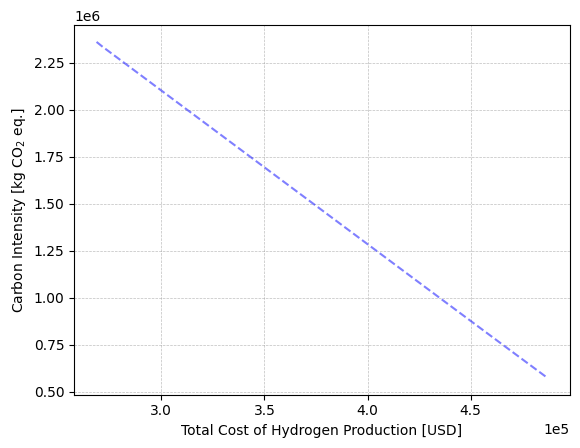

In [49]:
cost = [None for i in range(len(results))]
gwp_study = [None for i in range(len(results))]
prod_study = [None for i in range(len(results))]


for gwp_red, result in results.items():

    if result.output['termination'] == 'optimal':
        cost[gwp_red] = result.output['objective']
        gwp_study[gwp_red] = result.output['global_warming_potential_location']['HO', 0]
        prod_study[gwp_red] = result.output['P']

print(type(gwp_study[0]))

plt.plot(cost, gwp_study, color='blue', linestyle='--', alpha=0.5)

plt.xlabel('Total Cost of Hydrogen Production [USD]')
plt.ylabel('Carbon Intensity [kg CO$_2$ eq.]')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))  # For x-axis
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))  # For y-axis
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha = 0.5)
# gwp_study[0]


In [64]:
gwp_study[75]
#prod_study[0] ['HO', 'ATR_CCS_R', 0, 0]

# for gwp_reduction in range(len(results)):
#     if prod_study[gwp_reduction] is not None:
#         plt.plot([prod_study[gwp_reduction]['HO', 'SMR', 0, hour] for hour in range(24)], color = (1 - gwp_reduction/100,gwp_reduction/100,0))


572497.4892069781

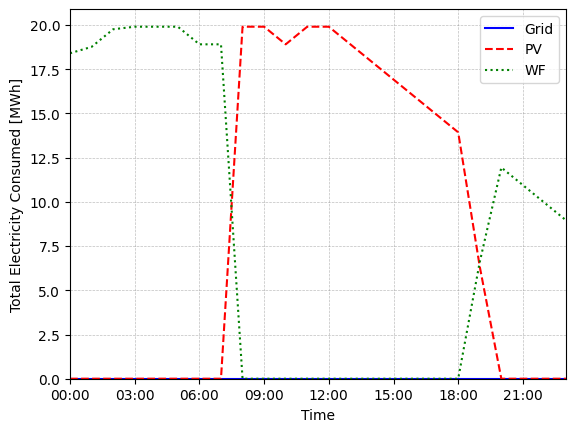

In [51]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Generate time labels
time_labels = [datetime(2024, 1, 1) + timedelta(hours=i) for i in range(24)]

# Plotting the data
plt.plot(time_labels, [prod_study[75]['HO', 'Grid', 0, hour] for hour in range(24)], color='blue', label="Grid")
plt.plot(time_labels, [prod_study[75]['HO', 'PV', 0, hour] for hour in range(24)], color='red', linestyle='--', label="PV")
plt.plot(time_labels, [prod_study[75]['HO', 'WF', 0, hour] for hour in range(24)], color='g', linestyle=':', label="WF")


# Labeling axes
plt.xlabel('Time')
plt.ylabel('Total Electricity Consumed [MWh]')

# Format the y-axis in scientific notation
plt.ticklabel_format(style='sci', axis='y')  

# Set limits for y and x axes
plt.ylim(bottom=0)
plt.xlim([time_labels[0], time_labels[-1]])

# Set custom time labels for the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:Minute format
plt.xticks(time_labels[::3])  # Show every second hour for better spacing

# Add grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Display legend
plt.legend()

# Show the plot
plt.show()

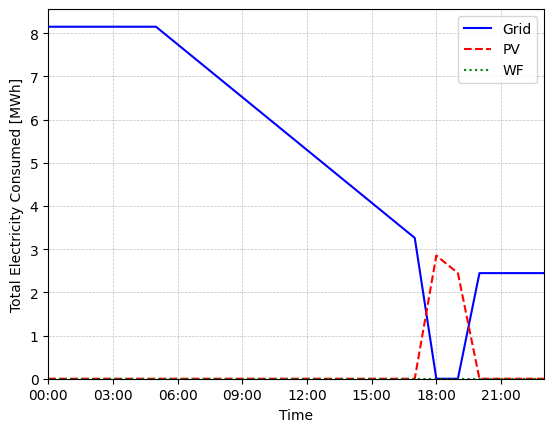

In [52]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Generate time labels
#For an entire year of hour data point I should maybe just discretize it into only months??
'''Second discretization is months, do I do a : "for i in range(12), for i in range(24)" so how do I make two time periods talk with each other?'''
time_labels = [datetime(2024, 1, 1) + timedelta(hours=i) for i in range(24)]
#datetime(2024, i, j,k) for i in range(1), for j in range(12), for k in range(24)
'''month_labels = [datetime(2024,1,1) + timedelta(months=i) for i in range(12)]'''

# Plotting the data
'''Example -> plt.plot(time_labels, [prod_study[0]['HO', 'Grid', month, hour] for month in range(12), for hour in range(24)], label="Grid")'''
plt.plot(time_labels, [y['HO', 'Grid', 0, hour] for hour in range(24)], color='blue', label="Grid")
plt.plot(time_labels, [y['HO', 'PV', 0, hour] for hour in range(24)], color='red', linestyle='--', label="PV")
plt.plot(time_labels, [y['HO', 'WF', 0, hour] for hour in range(24)], color='g', linestyle=':', label="WF")


# Labeling axes
plt.xlabel('Time')
plt.ylabel('Total Electricity Consumed [MWh]')

# Format the y-axis in scientific notation
plt.ticklabel_format(style='sci', axis='y')  

# Set limits for y and x axes
plt.ylim(bottom=0)
plt.xlim([time_labels[0], time_labels[-1]])

# Set custom time labels for the x-axis
'''plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Mo?:%D:%H:%M))'''
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:Minute format
plt.xticks(time_labels[::3])  # Show every second hour for better spacing this will have to be extend to show every 6 hours or actually not showing hours at all
'''plt.xticks(month_labels[::2] to show every second month?'''
# Add grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Display legend
plt.legend()

# Show the plot
plt.show()

In [53]:
# for gwp_reduction in range(len(results)):
#     if prod_study[gwp_reduction] is not None:
#         plt.plot([prod_study[gwp_reduction]['HO', 'SMR', 0, hour] for hour in range(24)], color = (1 - gwp_reduction/100,gwp_reduction/100,0))

In [54]:
# for gwp_reduction in range(len(results)):
#     if prod_study[gwp_reduction] is not None:
#         plt.plot([prod_study[gwp_reduction]['HO', 'SMRCCS', 0, hour] for hour in range(24)], color = (1 - gwp_reduction/100,gwp_reduction/100,0))

In [55]:
# import matplotlib.pyplot as plt

# # Assuming prod_study[20]['HO', 'ATR_CCS_OC', 0, hour] etc. contain the data for 24 hours

# # Create the figure and axis
# fig, ax = plt.subplots()

# # Plot ATR_CCS_OC and ATR_CCS_R on the primary y-axis
# ax.plot([prod_study[15]['HO', 'ATR_CCS_OC', 0, hour] for hour in range(24)], label='ATR_CCS_OC', color='b')
# ax.plot([prod_study[15]['HO', 'ATR_CCS_R', 0, hour] for hour in range(24)], label='ATR_CCS_R', color='r')

# # Set labels for the primary y-axis
# ax.set_xlabel('Hour of the Day')
# ax.set_ylabel('ATR_CCS Production', color='black')

# # Create a second y-axis for PEM and AWE
# ax2 = ax.twinx()

# # Plot PEM and AWE on the secondary y-axis
# ax2.plot([prod_study[15]['HO', 'PEM', 0, hour] for hour in range(24)], label='PEM', color='g')
# ax2.plot([prod_study[15]['HO', 'AWE', 0, hour] for hour in range(24)], label='AWE', color='purple')

# # Set labels for the secondary y-axis
# ax2.set_ylabel('PEM and AWE Production', color='black')

# # Add a title
# plt.title('Hydrogen Production for ATR_CCS, PEM, and AWE')

# # Combine both axes' legends
# lines_1, labels_1 = ax.get_legend_handles_labels()
# lines_2, labels_2 = ax2.get_legend_handles_labels()
# ax.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# # Show the plot
# plt.show()

In [56]:
# for gwp_reduction in range(len(results)):
#     if prod_study[gwp_reduction] is not None:
#         plt.plot([prod_study[gwp_reduction]['HO', 'ATR_CCS_R_OC', 0, hour] for hour in range(24)], color = (1 - gwp_reduction/100,gwp_reduction/100,0))

In [57]:
# for gwp_reduction in range(len(results)):
#     if prod_study[gwp_reduction] is not None:
#         plt.plot([prod_study[gwp_reduction]['HO', 'ATR_CCS_OC', 0, hour] for hour in range(24)], color = (1 - gwp_reduction/100,gwp_reduction/100,0))

In [58]:
# for gwp_reduction in range(len(results)):
#     if prod_study[gwp_reduction] is not None:
#         plt.plot([prod_study[gwp_reduction]['HO', 'ATR_CCS_R', 0, hour] for hour in range(24)], color = (1 - gwp_reduction/100,gwp_reduction/100,0))

In [59]:
# import matplotlib.pyplot as plt
# plt.plot([prod_study[17]['HO', 'ATR_CCS_R', 0, hour] for hour in range(24)], color = 'g')

# plt.xlabel('Time [hr]')
# plt.ylabel('Total Amount of Hydrogen Produced [kg/hr]')
# plt.ticklabel_format(style='sci', axis='x')  # For x-axis
# plt.ticklabel_format(style='sci', axis='y')  # For y-axis
# plt.ylim(bottom=0)
# plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha = 0.5)


In [60]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from datetime import datetime, timedelta

# # Generate time labels
# time_labels = [datetime(2024, 1, 1) + timedelta(hours=i) for i in range(24)]

# # Plotting the data
# plt.plot(time_labels, [prod_study[0]['HO', 'ATR_CCS_R', 0, hour] for hour in range(24)], color='red', label="Base Case")
# plt.plot(time_labels, [prod_study[5]['HO', 'ATR_CCS_R', 0, hour] for hour in range(24)], color='darkorange', label="")
# plt.plot(time_labels, [prod_study[10]['HO', 'ATR_CCS_R', 0, hour] for hour in range(24)], color='gold', label="Study 10")
# plt.plot(time_labels, [prod_study[17]['HO', 'ATR_CCS_R', 0, hour] for hour in range(24)], color='yellowgreen', label="Study 15")

# # Labeling axes
# plt.xlabel('Time')
# plt.ylabel('Total Amount of Hydrogen Produced [kg/hr]')

# # Format the y-axis in scientific notation
# plt.ticklabel_format(style='sci', axis='y')  

# # Set limits for y and x axes
# plt.ylim(bottom=3000)
# plt.xlim([time_labels[0], time_labels[-1]])

# # Set custom time labels for the x-axis
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:Minute format
# plt.xticks(time_labels[::3])  # Show every second hour for better spacing

# # Add grid
# plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# # Display legend
# plt.legend()

# # Show the plot
# plt.show()


C:\Users\marcopdsousa\AppData\Local\Temp\ipykernel_34132\938787185.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis_r', len(data_sets))


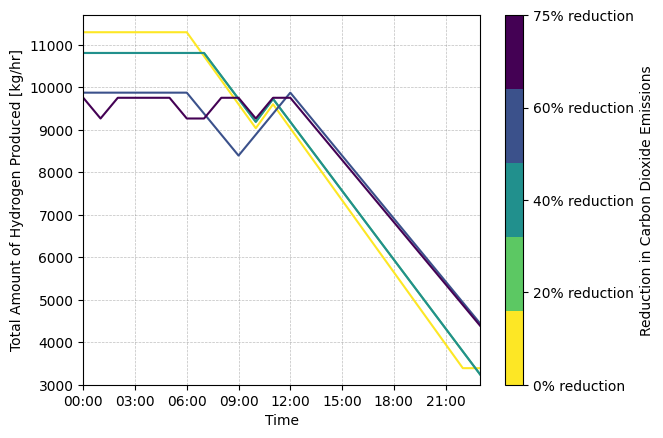

In [61]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import numpy as np

# Generate time labels
time_labels = [datetime(2024, 1, 1) + timedelta(hours=i) for i in range(24)]

# Data for plotting
data_sets = [0, 20, 40, 60, 75]  # Indices of the different datasets

# Create a colormap from red to yellowgreen
cmap = plt.cm.get_cmap('viridis_r', len(data_sets))

# Plot each dataset with its corresponding color
for i, study in enumerate(data_sets):
    plt.plot(time_labels, 
             [prod_study[study]['HO', 'SMR', 0, hour] for hour in range(24)], 
             color=cmap(i), label=f'Study {study}')

# Labeling axes
plt.xlabel('Time')
plt.ylabel('Total Amount of Hydrogen Produced [kg/hr]')

# Format the y-axis in scientific notation
plt.ticklabel_format(style='sci', axis='y')

# Set limits for y and x axes
plt.ylim(bottom=3000)
plt.xlim([time_labels[0], time_labels[-1]])

# Set custom time labels for the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:Minute format
plt.xticks(time_labels[::3])  # Show every second hour for better spacing

# Add grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Create a colorbar to represent the spectrum of the studies
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(data_sets) - 1))
sm.set_array([])  # Empty array for the colorbar
cbar = plt.colorbar(sm, ax=plt.gca(), ticks=np.linspace(0, len(data_sets) - 1, len(data_sets)))
cbar.set_label('Reduction in Carbon Dioxide Emissions')
cbar.set_ticks([0, 1, 2, 3,4])
cbar.set_ticklabels([f'{study}% reduction' for study in data_sets])

# Show the plot
plt.show()


C:\Users\marcopdsousa\AppData\Local\Temp\ipykernel_34132\1133509721.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis_r', len(data_sets))


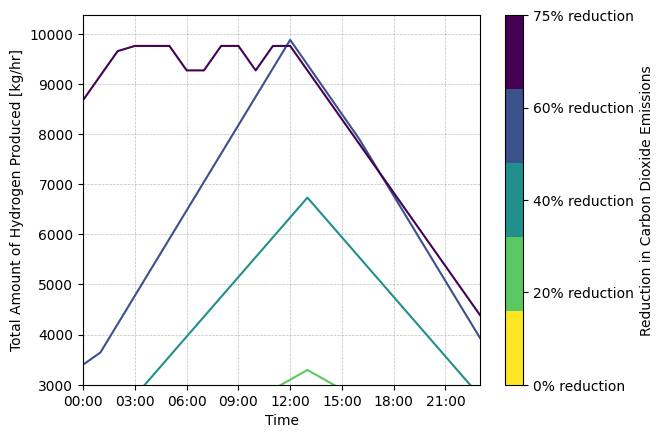

In [62]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import numpy as np

# Generate time labels
time_labels = [datetime(2024, 1, 1) + timedelta(hours=i) for i in range(24)]

# Data for plotting
data_sets = [0, 20, 40, 60, 75]  # Indices of the different datasets

# Create a colormap from red to yellowgreen
cmap = plt.cm.get_cmap('viridis_r', len(data_sets))

# Plot each dataset with its corresponding color
for i, study in enumerate(data_sets):
    plt.plot(time_labels, 
             [prod_study[study]['HO', 'SMRCCS', 0, hour] for hour in range(24)], 
             color=cmap(i), label=f'Study {study}')

# Labeling axes
plt.xlabel('Time')
plt.ylabel('Total Amount of Hydrogen Produced [kg/hr]')

# Format the y-axis in scientific notation
plt.ticklabel_format(style='sci', axis='y')

# Set limits for y and x axes
plt.ylim(bottom=3000)
plt.xlim([time_labels[0], time_labels[-1]])

# Set custom time labels for the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:Minute format
plt.xticks(time_labels[::3])  # Show every second hour for better spacing

# Add grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Create a colorbar to represent the spectrum of the studies
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(data_sets) - 1))
sm.set_array([])  # Empty array for the colorbar
cbar = plt.colorbar(sm, ax=plt.gca(), ticks=np.linspace(0, len(data_sets) - 1, len(data_sets)))
cbar.set_label('Reduction in Carbon Dioxide Emissions')
cbar.set_ticks([0, 1, 2, 3,4])
cbar.set_ticklabels([f'{study}% reduction' for study in data_sets])

# Show the plot
plt.show()


In [ ]:
# plt.plot([prod_study[5]['HO', 'ATR_CCS_R', 0, hour] for hour in range(24)], color = 'darkorange')

# plt.xlabel('Time [hr]')
# plt.ylabel('Total Amount of Hydrogen Produced [kg/hr]')
# plt.ticklabel_format(style='sci', axis='x')  # For x-axis
# plt.ticklabel_format(style='sci', axis='y')  # For y-axis
# plt.ylim(bottom=0)
# plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha = 0.5)

In [ ]:
# plt.plot([prod_study[10]['HO', 'ATR_CCS_R', 0, hour] for hour in range(24)], color = 'gold')

# plt.xlabel('Time [hr]')
# plt.ylabel('Total Amount of Hydrogen Produced [kg/hr]')
# plt.ticklabel_format(style='sci', axis='x')  # For x-axis
# plt.ticklabel_format(style='sci', axis='y')  # For y-axis
# plt.ylim(bottom=0)
# plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha = 0.5)

In [ ]:
# plt.plot([prod_study[15]['HO', 'ATR_CCS_R', 0, hour] for hour in range(24)], color = 'yellowgreen')

# plt.xlabel('Time [hr]')
# plt.ylabel('Total Amount of Hydrogen Produced [kg/hr]')
# plt.ticklabel_format(style='sci', axis='x')  # For x-axis
# plt.ticklabel_format(style='sci', axis='y')  # For y-axis
# plt.ylim(bottom=0)
# plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha = 0.5)

In [ ]:
# for gwp_reduction in range(len(results)):
#     if prod_study[gwp_reduction] is not None:
#         plt.plot([prod_study[gwp_reduction]['HO', 'PEM', 0, hour] for hour in range(24)], color = (1 - gwp_reduction/100,gwp_reduction/100,0))

In [ ]:
# for gwp_reduction in range(len(results)):
#     if prod_study[gwp_reduction] is not None:
#         plt.plot([prod_study[gwp_reduction]['HO', 'AWE', 0, hour] for hour in range(24)], color = (1 - gwp_reduction/100,gwp_reduction/100,0))

## STOP RIGHT HERE, DON'T PLAY AROUND WITH EXCEL SO MUCH 